In [1]:
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


In [7]:
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 13s 1us/step


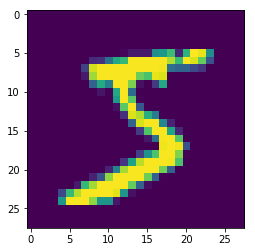

In [8]:
#plot the first image in the dataset
plt.imshow(X_train[0])

In [9]:
#check image shape
X_train[0].shape

(28, 28)

In [10]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [11]:
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [13]:
#compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
#train model
model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=3)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 117s 2ms/step - loss: 9.4191 - acc: 0.4143 - val_loss: 9.2027 - val_acc: 0.4284
Epoch 2/3
60000/60000 [==============================] - 111s 2ms/step - loss: 9.5863 - acc: 0.4050 - val_loss: 10.1791 - val_acc: 0.3684
Epoch 3/3
60000/60000 [==============================] - 131s 2ms/step - loss: 9.2755 - acc: 0.4244 - val_loss: 9.0157 - val_acc: 0.4405


In [15]:
#show predictions for the first 3 images in the test set
model.predict(X_test[:4])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
#show actual results for the first 3 images in the test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)